<a href="https://colab.research.google.com/github/meriemdouider1/2/blob/main/3(adma).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import json
import math
import os
import cv2
import numpy as np
from keras import layers
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical# convert to one-hot-encoding
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools
%matplotlib inline
from glob import glob
from keras import Model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tqdm import tqdm_notebook
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import load_model, Model


In [73]:
! pip install -q kaggle

In [74]:
from google.colab import files

In [75]:
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"meryemdouider","key":"71abdf1b37f401d9b4f539d2b43177eb"}'}

In [76]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download "sshikamaru/glaucoma-detection"

kaggle.json
glaucoma-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [77]:
!unzip glaucoma-detection.zip

Archive:  glaucoma-detection.zip
replace Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/001.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/002.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/003.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/004.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/005.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/006.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/007.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/008.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/009.jpg  
  inflating: Fundus_Train_Val_Dat

In [78]:
DATAGlua_Train = '/content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train'
DATAGlua_Test = '/content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation'

In [79]:
CATEGORIES  = list()
for root, dirs, files in os.walk(DATAGlua_Train, topdown=False):
    for name in dirs:
        CATEGORIES.append(os.path.join(name))
print (CATEGORIES)

['Glaucoma_Negative', 'Glaucoma_Positive']


In [80]:
x_train_data = []
y_train_data = []
IMG_SIZE=224
def creation_train_data():
    for category in CATEGORIES:
      path = os.path.join(DATAGlua_Train, category)
      class_num = CATEGORIES.index(category)
      for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            x_train_data.append(new_array)
            y_train_data.append(class_num)
        except Exception as e:
            pass
creation_train_data()

In [81]:
x_test_data = []
y_test_data = []
IMG_SIZE=224
def creation_test_data():
    for category in CATEGORIES:
      path = os.path.join(DATAGlua_Test, category)
      class_num = CATEGORIES.index(category)
      for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            x_test_data.append(new_array)
            y_test_data.append(class_num)
        except Exception as e:
            pass
creation_test_data ()

In [82]:
X_Train, X_Val, Y_Train, Y_Val = train_test_split(x_train_data, y_train_data, test_size=0.05, random_state=1)

In [83]:
X_Train = np. squeeze(np.array(X_Train))
X_Val = np. squeeze(np.array(X_Val))
Y_Train = np. squeeze(np.array(Y_Train))
Y_Val = np. squeeze(np.array(Y_Val))
x_test_data = np. squeeze(np.array(x_test_data))

In [84]:
Y_Train = to_categorical(Y_Train)
Y_Val = to_categorical(Y_Val)

# **modèle 3 :**

In [85]:
####resnet_v2

In [86]:
IMG_SHAPE = (224, 224,3)

In [87]:
from tensorflow.keras.applications import inception_resnet_v2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten

In [88]:
base_model3 = inception_resnet_v2.InceptionResNetV2

base_model3 = base_model3(weights='imagenet', include_top=False)

In [89]:
for layer in base_model3.layers:
    print(layer.name)
    layer.trainable = False
    
print(len(base_model3.layers))

input_3
conv2d_406
batch_normalization_406
activation_406
conv2d_407
batch_normalization_407
activation_407
conv2d_408
batch_normalization_408
activation_408
max_pooling2d_8
conv2d_409
batch_normalization_409
activation_409
conv2d_410
batch_normalization_410
activation_410
max_pooling2d_9
conv2d_414
batch_normalization_414
activation_414
conv2d_412
conv2d_415
batch_normalization_412
batch_normalization_415
activation_412
activation_415
average_pooling2d_2
conv2d_411
conv2d_413
conv2d_416
conv2d_417
batch_normalization_411
batch_normalization_413
batch_normalization_416
batch_normalization_417
activation_411
activation_413
activation_416
activation_417
mixed_5b
conv2d_421
batch_normalization_421
activation_421
conv2d_419
conv2d_422
batch_normalization_419
batch_normalization_422
activation_419
activation_422
conv2d_418
conv2d_420
conv2d_423
batch_normalization_418
batch_normalization_420
batch_normalization_423
activation_418
activation_420
activation_423
block35_1_mixed
block35_1_conv


In [90]:
base_model3.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_406 (Conv2D)             (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_406 (BatchN (None, None, None, 3 96          conv2d_406[0][0]                 
__________________________________________________________________________________________________
activation_406 (Activation)     (None, None, None, 3 0           batch_normalization_406[0][0]    
________________________________________________________________________________

In [91]:
base_model3.trainable = False

In [92]:
x = base_model3.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(2, activation='sigmoid')(x)


model3 = Model(base_model3.input, x)
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [93]:

model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_406 (Conv2D)             (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_406 (BatchN (None, None, None, 3 96          conv2d_406[0][0]                 
__________________________________________________________________________________________________
activation_406 (Activation)     (None, None, None, 3 0           batch_normalization_406[0][0]    
____________________________________________________________________________________________

In [94]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

In [95]:
train_datagen.fit(X_Train)

In [96]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen.fit(X_Val)

In [97]:
train_model  = model3.fit(X_Train, Y_Train, batch_size=64, epochs=10,
                    validation_data=(X_Val, Y_Val))

Epoch 1/10
8/8 [==============================] - 14s 722ms/step - loss: 310.7401 - accuracy: 0.5726 - val_loss: 23.6586 - val_accuracy: 0.7692
Epoch 2/10
8/8 [==============================] - 2s 313ms/step - loss: 43.9906 - accuracy: 0.6218 - val_loss: 67.9071 - val_accuracy: 0.7692
Epoch 3/10
8/8 [==============================] - 3s 316ms/step - loss: 65.8789 - accuracy: 0.6098 - val_loss: 34.4357 - val_accuracy: 0.7692
Epoch 4/10
8/8 [==============================] - 3s 317ms/step - loss: 35.6097 - accuracy: 0.6367 - val_loss: 28.0102 - val_accuracy: 0.1923
Epoch 5/10
8/8 [==============================] - 3s 316ms/step - loss: 24.2596 - accuracy: 0.5551 - val_loss: 10.0138 - val_accuracy: 0.7692
Epoch 6/10
8/8 [==============================] - 3s 319ms/step - loss: 52.2467 - accuracy: 0.5622 - val_loss: 96.5335 - val_accuracy: 0.7692
Epoch 7/10
8/8 [==============================] - 3s 320ms/step - loss: 197.1676 - accuracy: 0.7152 - val_loss: 264.0216 - val_accuracy: 0.2308
Ep

In [98]:
for layer in model3.layers[:780]:
    layer.trainable = False

for layer in model3.layers[780:]:
    layer.trainable = True

In [99]:
optimizer =Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

In [100]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_406 (Conv2D)             (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_406 (BatchN (None, None, None, 3 96          conv2d_406[0][0]                 
__________________________________________________________________________________________________
activation_406 (Activation)     (None, None, None, 3 0           batch_normalization_406[0][0]    
____________________________________________________________________________________________

In [101]:

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=3)

In [102]:
train_model  = model3.fit(X_Train, Y_Train, batch_size=64, epochs=20,
                    validation_data=(X_Val, Y_Val))

Epoch 1/20
8/8 [==============================] - 15s 711ms/step - loss: 475.6362 - acc: 0.5836 - val_loss: 364.0601 - val_acc: 0.7692
Epoch 2/20
8/8 [==============================] - 3s 321ms/step - loss: 318.8134 - acc: 0.6272 - val_loss: 17.6307 - val_acc: 0.7692
Epoch 3/20
8/8 [==============================] - 3s 324ms/step - loss: 110.3116 - acc: 0.5545 - val_loss: 82.7136 - val_acc: 0.7692
Epoch 4/20
8/8 [==============================] - 3s 326ms/step - loss: 144.2269 - acc: 0.5974 - val_loss: 231.1920 - val_acc: 0.7692
Epoch 5/20
8/8 [==============================] - 3s 325ms/step - loss: 234.6529 - acc: 0.7282 - val_loss: 111.2830 - val_acc: 0.2308
Epoch 6/20
8/8 [==============================] - 3s 326ms/step - loss: 147.8375 - acc: 0.6130 - val_loss: 18.3966 - val_acc: 0.7692
Epoch 7/20
8/8 [==============================] - 3s 326ms/step - loss: 166.6496 - acc: 0.5368 - val_loss: 190.4341 - val_acc: 0.7692
Epoch 8/20
8/8 [==============================] - 3s 329ms/step 

In [103]:
loss_val, acc_val = model3.evaluate(X_Val, Y_Val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))

1/1 [==============================] - 0s 151ms/step - loss: 35.6556 - acc: 0.7692
Validation: accuracy = 0.769231  ;  loss_v = 35.655586


In [104]:
y_test_data = to_categorical(y_test_data)
loss_test, acc_test = model3.evaluate(x_test_data, y_test_data, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

5/5 [==============================] - 1s 127ms/step - loss: 39.8309 - acc: 0.7385
Test: accuracy = 0.738462  ;  loss = 39.830917


In [105]:
model3.save("Incep_ResNet_v2.h5")

Text(0.5, 1.0, 'train_model')

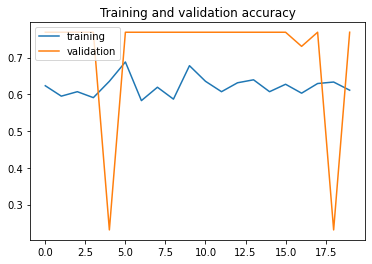

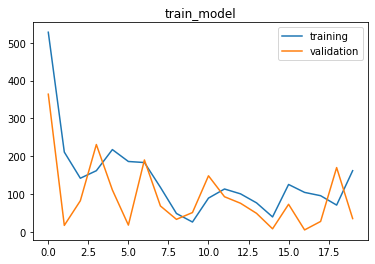

In [106]:

acc =train_model.history['acc']
val_acc = train_model.history['val_acc']


loss = train_model.history['loss']
val_loss = train_model.history['val_loss']


epochs = range(len(acc))


plt.plot(epochs, acc, label = "training")
plt.plot(epochs, val_acc, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('train_model')